![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab 2. Random variable distributions - 03-02-21

Refer to the `files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv` dataset.

### Instructions

1. Get the numerical variables from our dataset.
2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.


In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

import datetime

In [2]:
customer_df = pd.read_csv('c:/Users/kyear/Documents/Personal/Education/Ironhack/16_Python.MissingData_DataCleaning_RegExp/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df.columns = customer_df.columns.str.lower()
customer_df.columns = customer_df.columns.str.replace(' ','_')
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### 1.  Get the numerical variables from our dataset.

In [4]:
categorical = pd.DataFrame()
numerical = pd.DataFrame()

def diff_dtypes(x):
    for i in x:
        if customer_df[i].dtype == 'object':
            categorical[i] = customer_df[i]
        elif customer_df[i].dtype == 'int64' or customer_df[i].dtype == 'float64':
            numerical[i] = customer_df[i]
     
diff_dtypes(list(customer_df.columns))

In [5]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


### 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

In [6]:
def distplot_df(df):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    cols=list(df.columns)
    
    for col in cols:
        sns.distplot(df[col])
        plt.show()

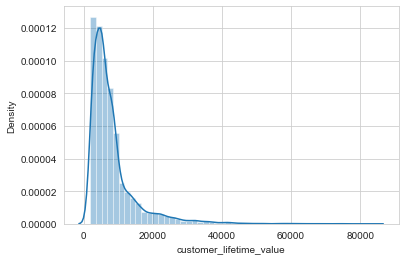

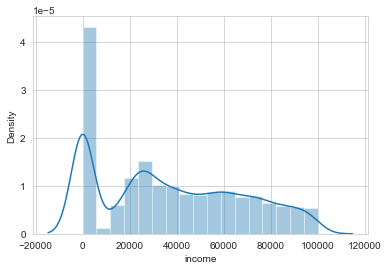

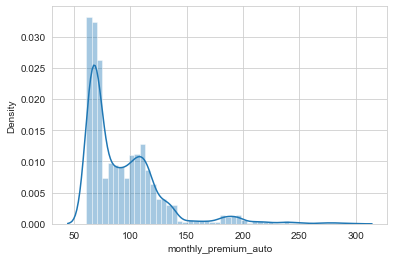

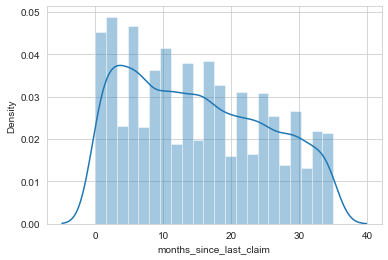

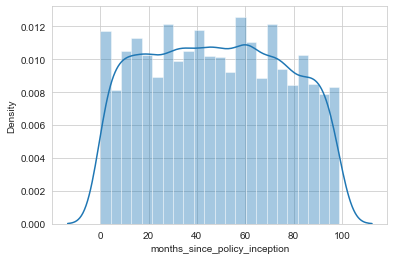

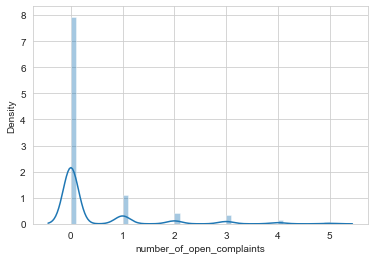

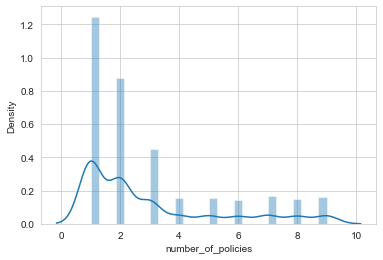

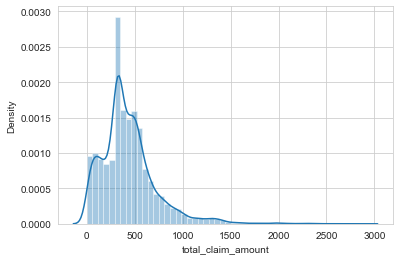

In [7]:
distplot_df(numerical)

### 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

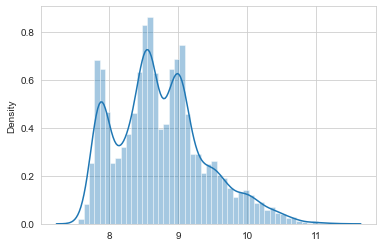

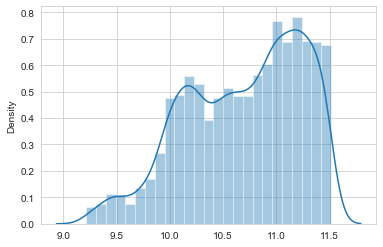

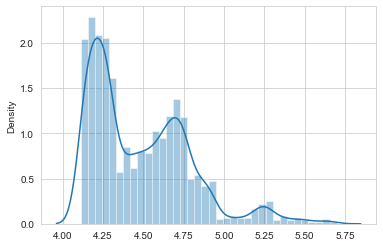

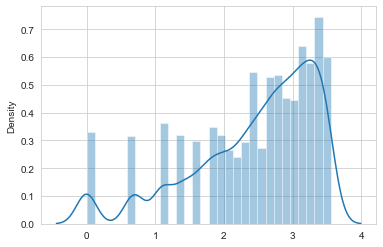

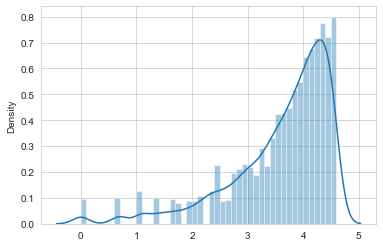

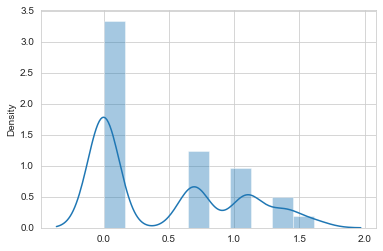

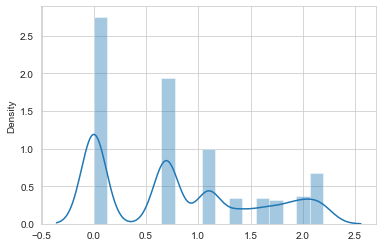

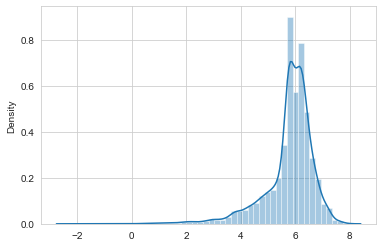

In [8]:
def log_transfom_clean(x):
    if np.isfinite(x) and x!=0: # If the value is finite and != 0...
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later
for i in numerical:
    data_log = list(map(log_transfom_clean, numerical[i]))
    sns.distplot(data_log)
    plt.show()

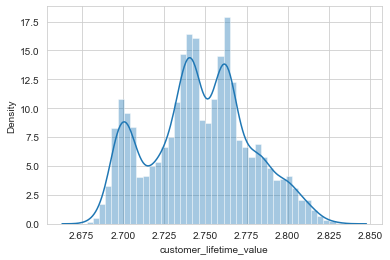

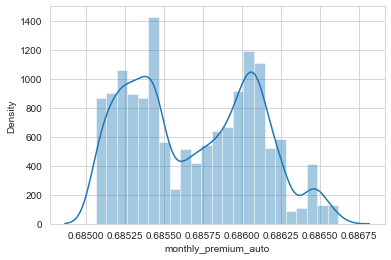

In [9]:
boxcox_transform = ['customer_lifetime_value', 'monthly_premium_auto']

from scipy.stats import boxcox
for i in boxcox_transform:
    plt.figure()
    numerical[i], best_lambda = boxcox(numerical[i])
    sns.distplot(numerical[i])